<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("teleCust.csv")

# Prepare data
X = df.drop("custcat", axis=1).values
y = df["custcat"].values

In [2]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Initial model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Model (k=5): {accuracy:.4f}")

# Test multiple k values
accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

best_k = np.argmax(accuracies) + 1
print(f"Best k value: {best_k}, Accuracy: {accuracies[best_k-1]:.4f}")

Accuracy of KNN Model (k=5): 0.3350
Best k value: 18, Accuracy: 0.3800


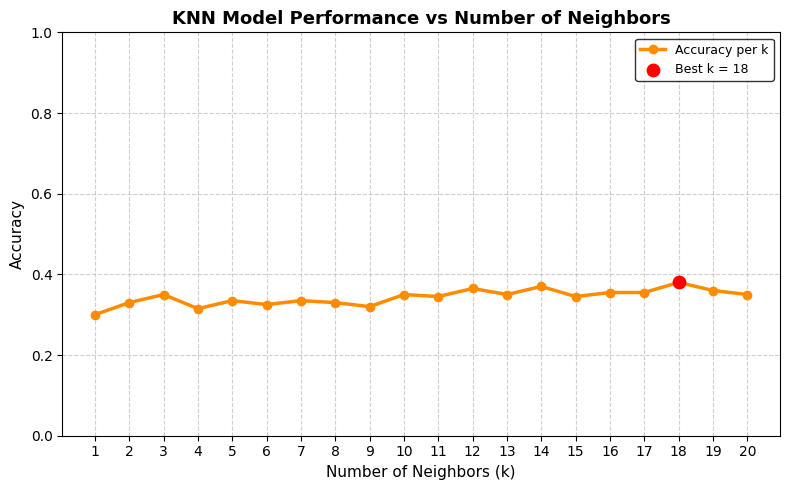

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracies, marker='o', color='darkorange', linewidth=2.5, label='Accuracy per k')
plt.scatter(best_k, accuracies[best_k - 1], color='red', s=80, zorder=5, label=f'Best k = {best_k}')

plt.title("KNN Model Performance vs Number of Neighbors", fontsize=13, fontweight='bold')
plt.xlabel("Number of Neighbors (k)", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.xticks(range(1, 21))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, edgecolor='black', fontsize=9)
plt.tight_layout()
plt.show()